# Cat vs Dog Classifier using original images from Kaggle Competition
**Data can be downloaded from the Kaggle page : https://www.kaggle.com/c/dogs-vs-cats/overview** <br>
This contains 25000 images of Doga & Cats. <br>
But we have filtered only 200 images from large dataset to 
### illustrate the Image Augmentation Technique to improve the model accuracy**

The challenge with Real-world images is that they are in different shapes, size, dimension aspect ratios, having multiple information in the same image, much noise, and coloured images etc

## Download the Image Dataset
Let's start by downloading our example data, a .zip of 2,000 JPG pictures of cats and dogs, and extracting it locally in `/tmp`.

**NOTE:** The 2,000 images used in this exercise are excerpted from the ["Dogs vs. Cats" dataset](https://www.kaggle.com/c/dogs-vs-cats/data) available on Kaggle, which contains 25,000 images. Here, we use a subset of the full dataset to decrease training time for educational purposes.

In [0]:
# Either download the file using Tensorflow api or donwload using 'wget' as shown in next cell
# import tensorflow as tf
# import os
# zip_file = tf.keras.utils.get_file(origin="https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip",
#                                    fname="/tmp/cats_and_dogs_filtered.zip", extract=True)
# base_dir, ext = os.path.splitext(zip_file)
# print(base_dir,ext)

In [0]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2019-09-01 10:17:20--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 2404:6800:4008:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  67.5MB/s    in 1.0s    

2019-09-01 10:17:21 (67.5 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import tensorflow as tf
zip_file = tf.keras.utils.get_file(origin="https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip",
                                   fname="cats_and_dogs_filtered.zip", extract=True)

68608000/68606236 [==============================] - 1s 0us/step


## Unzip the downloaded zipped Images Dataset
The contents of the .zip are extracted to the base directory `/tmp/cats_and_dogs_filtered`, which contains `train` and `validation` subdirectories for the training and validation datasets, which in turn each contain `cats` and `dogs` subdirectories.

In short: The training set is the data that is used to tell the neural network model that 'this is what a cat looks like', 'this is what a dog looks like' etc. The validation data set is images of cats and dogs that the neural network will not see as part of the training, so you can test how well or how badly it does in evaluating if an image contains a cat or a dog.

In [0]:
import os      # To access linux/windows file system
import zipfile  # To perform operations on zip file

# unzip training & validation dataset
local_zip = '/tmp/cats_and_dogs_filtered.zip'
with zipfile.ZipFile(local_zip, 'r') as zipobj:  # open a zip file in read mode
  zipobj.extractall('/tmp')  
#   zip.printdir()    # Display contents of zip file

# walk through the extracted directory
for root, directories, files in os.walk('/tmp/cats_and_dogs_filtered'): 
  print(root)
  print(directories)
#   print(files)

# # unzip validation dataset
# local_zip = '/tmp/validation-horse-or-human.zip'
# with zipfile.ZipFile(local_zip, 'r') as zipobj:  # open a zip file in read mode
#   zipobj.extractall('/tmp/validation-horse-or-human')  
  
# # walk through the extracted validation directory
# for root, directories, files in os.walk('/tmp/validation-horse-or-human'): 
#   print(root)
#   print(directories)
# #   print(files)

/tmp/cats_and_dogs_filtered
['train', 'validation']
/tmp/cats_and_dogs_filtered/train
['dogs', 'cats']
/tmp/cats_and_dogs_filtered/train/dogs
[]
/tmp/cats_and_dogs_filtered/train/cats
[]
/tmp/cats_and_dogs_filtered/validation
['dogs', 'cats']
/tmp/cats_and_dogs_filtered/validation/dogs
[]
/tmp/cats_and_dogs_filtered/validation/cats
[]


## Define Cats & Dogs Directories

**Note:**In this sample: We do not explicitly label the images as cats or dogs. as we had labeled the handwriting example earlier between 0 to 9 by labeling that 'this is a 1', 'this is a 7' etc.  Here we use ImageGenerator that will read images from subdirectories, and automatically label them from the name of that subdirectory. So, for example, you will have a 'training' directory containing a 'cats' directory and a 'dogs' one. ImageGenerator will label the images appropriately for you, reducing a coding step. 

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
print(train_dir)

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_dogs_dir)

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_dogs_dir)

/tmp/cats_and_dogs_filtered/train
/tmp/cats_and_dogs_filtered/train/dogs
/tmp/cats_and_dogs_filtered/validation/dogs


## Display first 10 Cats and Dogs files names

In [0]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.24.jpg', 'cat.555.jpg', 'cat.81.jpg', 'cat.139.jpg', 'cat.908.jpg', 'cat.43.jpg', 'cat.987.jpg', 'cat.964.jpg', 'cat.934.jpg', 'cat.839.jpg']
['dog.557.jpg', 'dog.866.jpg', 'dog.412.jpg', 'dog.263.jpg', 'dog.346.jpg', 'dog.148.jpg', 'dog.458.jpg', 'dog.572.jpg', 'dog.205.jpg', 'dog.164.jpg']


## Display total number of cat and dog images in the `train` and `validation` directories

In [0]:
print('total training cat images :', len(os.listdir(train_cats_dir) ))
print('total training dog images :', len(os.listdir(train_dogs_dir) ))

print('total validation cat images :', len(os.listdir(validation_cats_dir) ))
print('total validation dog images :', len(os.listdir(validation_dogs_dir) ))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


In [0]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

Now, display a batch of 8 cat and 8 dog pictures. You can rerun the cell to see a fresh batch each time:

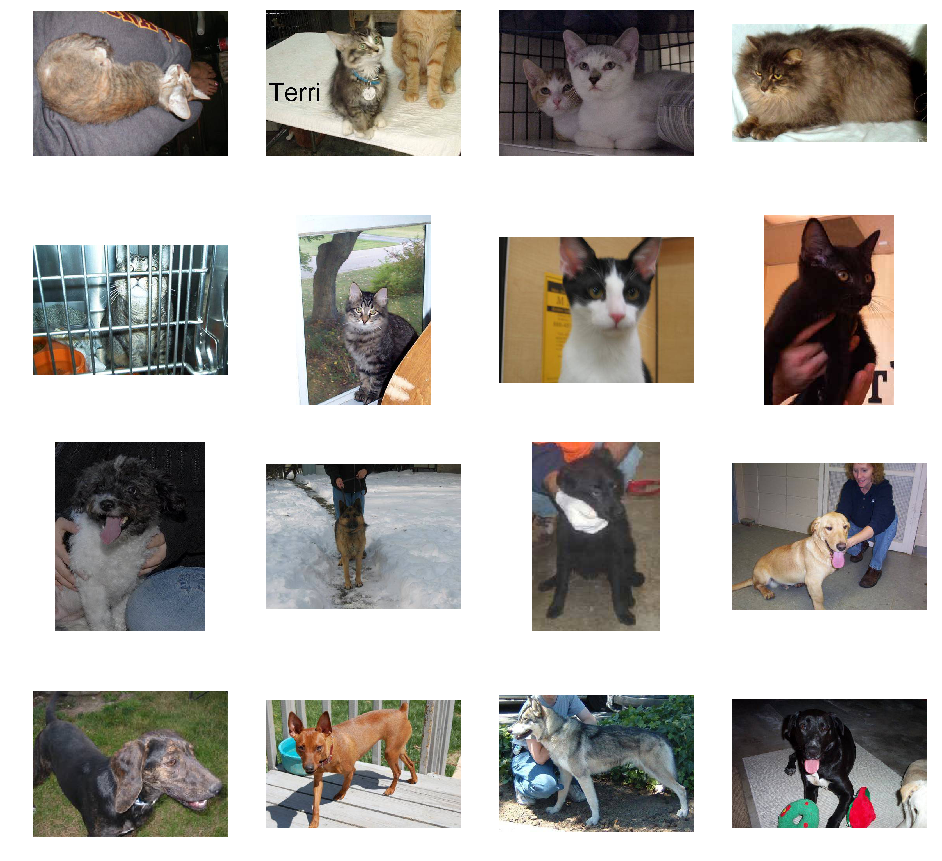

In [0]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


## Import Tensorflow

In [0]:
# !pip install -U tensorflow-gpu==2.0.0-rc0  # install tensorflow 2.0.0 in colab/kaggle
import tensorflow as tf
print(tf.__version__)

1.14.0


Next we will define a Sequential layer as before, adding some convolutional layers first. Note the input shape parameter this time. In the earlier example it was 28x28x1, because the image was 28x28 in greyscale (8 bits, 1 byte for color depth). This time it is 150x150 for the size and 3 (24 bits, 3 bytes) for the color depth. 



We then add a couple of convolutional layers as in the previous example, and flatten the final result to feed into the densely connected layers.

## Define the Model
**Notice** that the input shape mentioned in 150x150x3. The actual shape/dimesion of input image could be anything but we are converting them into 150x150x3 (3 = RGB for coloured images) 
Finally we add the densely connected layers. 

Since we are facing a two-class classification problem, i.e. a *binary classification problem*, we will end our network with a sigmoid activation, so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # Ist convolution layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    # 2nd convolution layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    # 3rd convolution layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden dense layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

## Prints model summary of the network 

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the dimensions.

## Compile the Model
Train our model with the `binary_crossentropy` loss, because it's a binary classification problem and our final activation is a sigmoid. We will use the `rmsprop` optimizer this time with a learning rate of `0.001`. We can use "adam" optimizer as well. Both of these automatically adapt the learning rate during training whereas SGD can't.

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['acc'])

## Data Preprocessing & Image Augmentation

Let's set up data generators that will read pictures in our source folders, convert them to `float32` tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of 20 images of size 150x150 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the Keras model methods that accept data generators as inputs: `fit_generator`, `evaluate_generator`, and `predict_generator`.

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#-------------EITHER USE THIS CODE TO SEE OVERFITTING PROBLEM--------------------------
# All images will be rescaled by 1.0/255
# ImageDataGenerator: generate batches of tensor image data with real-time data augmentation.
# train_datagen = ImageDataGenerator( rescale = 1.0/255) 

#-------------OR USE THIS CODE TO SOLVE OVERFITTING VIA IMAGE AUMENTATION---------------------
# In this piece of code, image augmention technique is used at run time. ie. The ImageGenerator will  
# now instead of just rescaling the image, it will also rotate and do other operations to do image
# augmentation
train_datagen = ImageDataGenerator(
      rescale=1.0/255,
      rotation_range=40,     # rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
      width_shift_range=0.2, # A fraction of total width within which to randomly translate pictures horizontally.
      height_shift_range=0.2,# A fraction of total height within which to randomly translate pictures vertically.
      shear_range=0.2,       # to randomly apply shearing transformations.
      zoom_range=0.2,        # To zoom the picturs randomly 
      horizontal_flip=True,
      fill_mode='nearest')   # strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.
#-------------------------------------------------------------------------------

test_datagen  = ImageDataGenerator( rescale = 1.0/255)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,  # Source directory path for training images
                                                    batch_size=20,   # Images are loaded in the batches of 20 images per batch
                                                    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
        # Using target size; All images will be resized automatically to 150x150 on runtime. In our case, 
        # images are of random size but we have put target size of 150x150
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Train the Model

You'll see 4 values per epoch -- Loss, Accuracy, Validation Loss and Validation Accuracy. 

The Loss and Accuracy are a great indication of progress of training. It's making a guess as to the classification of the training data, and then measuring it against the known label, calculating the result. Accuracy is the portion of correct guesses. The Validation accuracy is the measurement with the data that has not been used in training. 
**Notice** the accuracy, loss values and time taken to run each EPOCH without and with using Augmentation Technique. You will notice that training time for each EPOCH has incresed to twice as without Augmentation. Also now, the model requires more epochs to train on the traing dataset and still it has not achived the previous accuracy score (99%) in case of without AUgmentation.


In [0]:
history = model.fit_generator(train_generator,   # stream the generated normalized batch of images from training image dir
                              validation_data=validation_generator,
                        # steps_per_epoch=100 because batch_size=20. So, 100*20=2000 ie. 100 epochs are required to pass
                        # all images to model. And we have a total of 2000 images (1000 for cat and dog each)
                              steps_per_epoch=100,
                              epochs=50,   # No. of times for which whole dataset is passed to the model for training
                              validation_steps=50,    # Total 1000 validation images. So, 20(batch_size)x50=1000
                              verbose=1)    # decides how much data/logs to be displayed on screen during training

Epoch 1/50
100/100 [==============================] - 21s 213ms/step - loss: 0.8510 - acc: 0.4895 - val_loss: 0.6916 - val_acc: 0.5290
Epoch 2/50
100/100 [==============================] - 19s 191ms/step - loss: 0.6941 - acc: 0.5420 - val_loss: 0.6820 - val_acc: 0.5550
Epoch 3/50
100/100 [==============================] - 20s 196ms/step - loss: 0.6734 - acc: 0.6040 - val_loss: 0.6500 - val_acc: 0.6310
Epoch 4/50
100/100 [==============================] - 19s 194ms/step - loss: 0.6457 - acc: 0.6335 - val_loss: 0.6056 - val_acc: 0.6840
Epoch 5/50
100/100 [==============================] - 19s 194ms/step - loss: 0.6333 - acc: 0.6475 - val_loss: 0.6023 - val_acc: 0.6450
Epoch 6/50
100/100 [==============================] - 20s 196ms/step - loss: 0.6216 - acc: 0.6640 - val_loss: 0.5667 - val_acc: 0.6940
Epoch 7/50
100/100 [==============================] - 19s 194ms/step - loss: 0.6057 - acc: 0.6630 - val_loss: 0.5735 - val_acc: 0.6910
Epoch 8/50
100/100 [==============================] - 2

## Plotting the Result
Notice the variable `history` comes from the above step of training of model.
Notice the graph without data augmentationand with augmentation.


**Without Data/Image Augmentation Technique** <br>
In the graph, you can see that training accuracy reaches to 99% whereas test accuracy reaches only upto 72%. This is a clear sign of over fitting of model or high variance in which there is a big difference between training accuracy and test accuracy. 

**With Data Augmentation** <br>
The graph shows that the trend of training accuracy and validation accuacy is same, which shows that overfitting problem is solved.

range(0, 50)


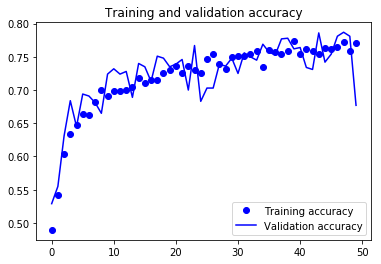

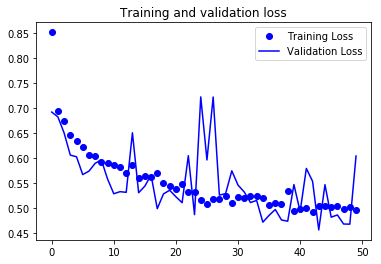

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']            # 'acc' varibale is a standard variable and comes from the training logs 
val_acc = history.history['val_acc']    # 'val_acc' varibale is a standard variable and comes from the training logs
loss = history.history['loss']          # 'loss' varibale is a standard variable and comes from the training logs
val_loss = history.history['val_loss']  # 'val_loss' varibale is a standard variable and comes from the training logs

epochs = range(len(acc))
print(epochs)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()    # create another figure (figure 2 in this case)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Predicting the image using trained Model
Lets do some prediction with our trained model and see how it performs.

Using TensorFlow backend.


(150, 150, 3)
(1, 150, 150, 3)
[[1.]]
 image is a dog


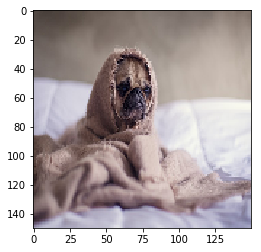

In [0]:
import numpy as np
from keras.preprocessing import image
import os
import matplotlib.pyplot as plt

# provide the full image path
# path = '/content/dog-3277416_640.jpg'
path = '/content/pug-1210025_640.jpg'


img = image.load_img(path, target_size=(150, 150))

plt.imshow(img)
  
image = image.img_to_array(img)  # convert image to an array
print(image.shape)

image = np.expand_dims(image, axis=0)  # increase the no. of dimension by 1
print(image.shape)

classes = model.predict(image, batch_size=10)
print(classes)
if classes[0]>0.5:
  print(" image is a dog")
else:
  print(" image is a cat")



### Visualizing Intermediate Representations

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random cat or dog image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


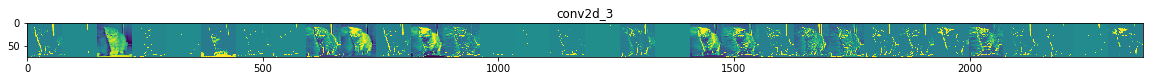

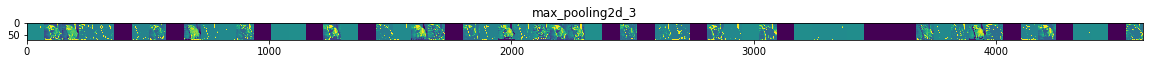

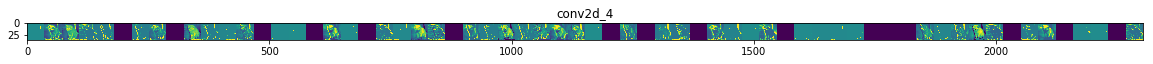

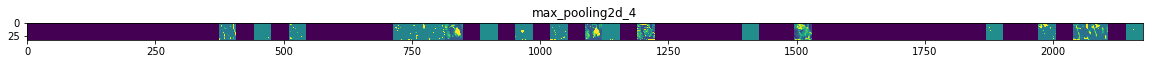

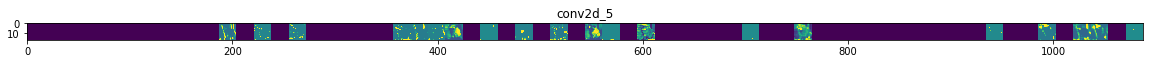

In [0]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

As you can see we go from the raw pixels of the images to increasingly abstract and compact representations. The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called "sparsity." Representation sparsity is a key feature of deep learning.


These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline.

## Google Colab Kernel Termination

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [0]:
import os, signal

os.kill(os.getpid(), signal.SIGKILL)